In [27]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\Linear Regression\\data\\data_of_Advertising.csv") 
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Simple Linear Regression

In [71]:
#initializing the variables
X=data['TV'].values.reshape(-1,1)
y=data['Sales'].values.reshape(-1,1)

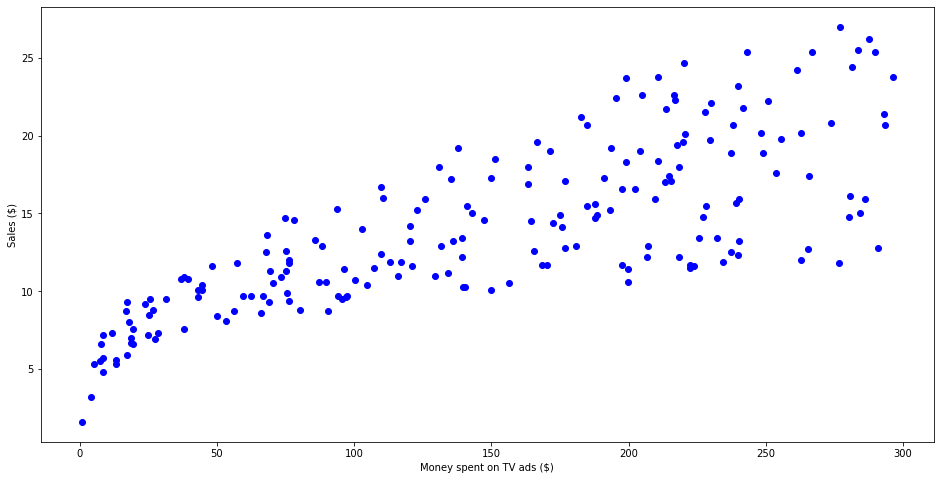

In [72]:
#ploting a grap to see the points
plt.figure(figsize=(16,8))
plt.scatter(X,y,c='blue')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [73]:
#splitting our dataset to training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
#fitting linear regression to the training set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

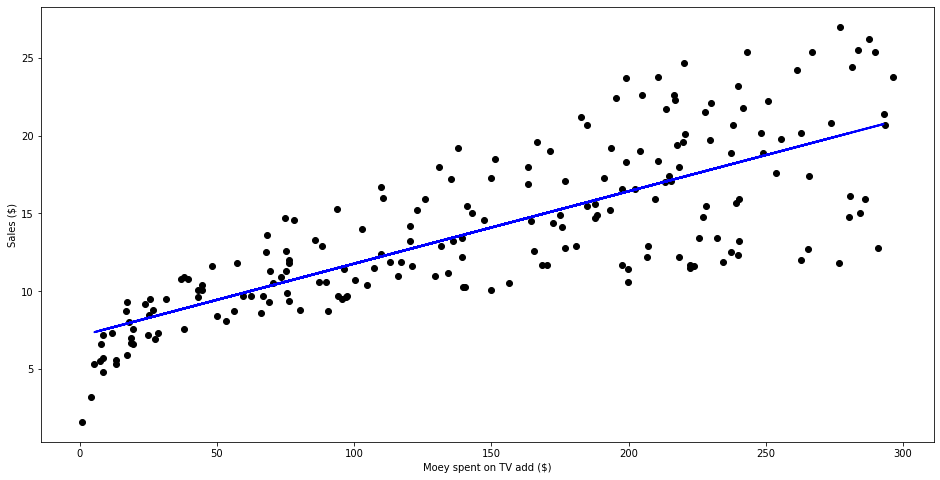

In [75]:
#predicting the test set result
y_pred=reg.predict(X_test)
plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X_test, y_pred, c='blue', linewidth=2)
plt.xlabel("Moey spent on TV add ($)")
plt.ylabel("Sales ($)")
plt.show()

In [76]:
#calculating the coefficients
reg.coef_

array([[0.04652973]])

In [77]:
#calculating the intercept
reg.intercept_

array([7.11963843])

In [78]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627076

In [79]:
output=reg.predict([[230.1]])
output

array([[17.82613016]])

# Multiple Linear Regression


In [80]:
#initializing the variables
X=data.drop(['Sales'], axis=1)
y=data['Sales'].values.reshape(-1,1)

In [81]:
#splitting our dataset to training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg=LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#predicting the test set result
y_pred=multiple_reg.predict(X_test)

In [84]:
#calculating the coefficients
multiple_reg.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [85]:
#calculating the intercepts
multiple_reg.intercept_

array([2.97906734])

In [86]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8994380241009119

In [ ]:
#taking the input from the user
print("Enter the amount you will invest on: ")
tv=float(input("TV : "))
radio=float(input("Radio : "))
newspaper=float(input("NewsPaper : "))

#predicting the sales with respect to the inputs
output=multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))